Taylor Tucker, Jeffrey Bradley, Virginia Weston

# KNN

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pp
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
import time

In [152]:
# Loading the cleaned dataset from the csv file using pandas
data = pd.read_csv('CleanedData.csv', header=0)

#import columns 
columns = data.columns
X = data[columns[0:-1]]
#X = data[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]]

Including all features versus excluding just race made no difference in accuracy, but it did make a difference in mean error.

In [153]:
#find and use median value as a binary classifier for Chance of Admission
median_value = data["Chance of Admit"].median()
for i in range(len(data["Chance of Admit"])):
    if data.loc[i, "Chance of Admit"] >= 0.73:
        data.loc[i, "Chance of Admit"] = 1
    else:
        data.loc[i, "Chance of Admit"] = 0

In [154]:
y = data["Chance of Admit"]
print('Class labels:', np.unique(y))
#print('Class labels:', np.unique(y))

Class labels: [0. 1.]


In [155]:
#split data 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [156]:
#Standardize features
scaler = pp.PowerTransformer()
#scaler = pp.StandardScaler()
#scaler = pp.MaxAbsScaler()
#scaler = pp.RobustScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

Standardize the features: Power Transformer works best b/c it maintained spacial relationships b/w data & made the features more Gaussian distributed

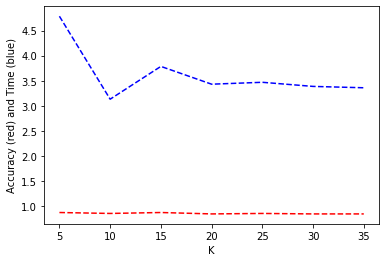

In [157]:
# K-nearest neighbors

knn_k = [5, 10, 15, 20, 25, 30, 35]
res_pred = []
res_times = []
for i in knn_k:
    t_b = time.perf_counter()
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='distance')
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    res_pred.append(accuracy_score(y_test, y_pred))
    t_e = time.perf_counter()
    res_times.append((t_e - t_b)*1000)
plt.plot(knn_k, res_pred, 'r--', knn_k, res_times, 'b--')
plt.xlabel('K')
plt.ylabel('Accuracy (red) and Time (blue)')
plt.show()

Tested different metrics, found manhattan to be best for the data (but only slightly better than euclidean). Also changed weight from uniform to distance, which used closest neighboring data points. Used time as a metric to ensure we utilize feature selection and dimensionality reduction. Found that although an n value of 15 gave the highest accuracy, it also took the most amount of time as a result of the curse of dimensionality, thus increasing the time.

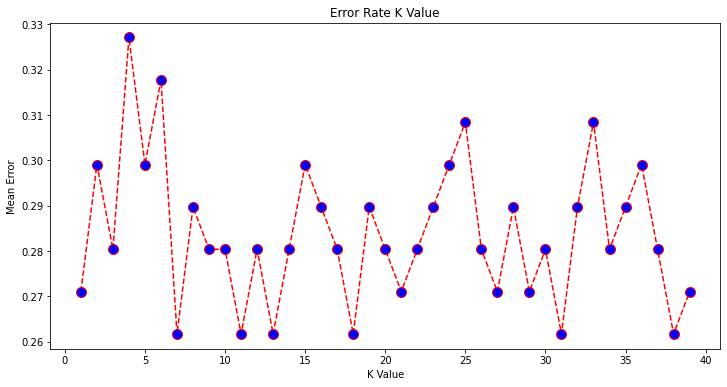

In [158]:
# Calculating error for K values between 1 and 40
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [159]:
# Best result given by n = 15, metric = 'manhattan', weights = 'distance'
knn_optimal = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance')
knn_optimal.fit(X_train_std, y_train)
y_optimal_pred = knn_optimal.predict(X_test_std)
print("KNN Accuracy: {}".format(accuracy_score(y_test, y_optimal_pred)))
print("KNN Precision: {}".format(precision_score(y_test, y_optimal_pred)))
print("Metrics: {}".format(classification_report(y_test, y_optimal_pred)))

KNN Accuracy: 0.8691588785046729
KNN Precision: 0.9019607843137255
Metrics:               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        52
         1.0       0.90      0.84      0.87        55

    accuracy                           0.87       107
   macro avg       0.87      0.87      0.87       107
weighted avg       0.87      0.87      0.87       107



n_neighbors = 15 gives best accuracy but has high mean error; 
n_neighbors = 13 gives just as good of accuracy and has lower mean error & 13 has longer runtime

Conlusion: The KNN model resulted in a decently high accuracy of 87% by using 15 as the number of neighbors with distance as the metric. Creating a mean error figure provided evidence that although the accuracy was high, there was still room for error in using 15 as the metric for the nearest neighbor. 